# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Timmothy Farrel
- **Email:** timmothyfarrel990@gmail.com
- **ID Dicoding:** timmyfarrel

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda selama jam sibuk di hari kerja?
2. Bagaimana pengaruh kondisi cuaca terhadap jumlah sepeda yang disewa di akhir pekan atau hari libur?
3.  Bagaimana perbedaan jumlah penyewaan sepeda di berbagai musim sepanjang tahun?
4. Bagaimana distribusi penyewaan sepeda berdasarkan kategorinya?

## Import Semua Packages/Library yang Digunakan

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

Langkah pertama adalah memuat data set yang tersimpan dalam "day.csv" dan "hour.csv"

In [121]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [122]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data yang ada terlihat masih sulit untuk dibaca
- Data terdiri dari dua, yaitu report per harian dan per jam an

### Assessing Data

Langkah kedua adalah menilai data, dengan melihat informasi setiap fitur pada masing-masing data frame dan melihat problem dari data yang ada


**Karakteristik Dataset**

File hour.csv dan day.csv mempunyai fitur-fitur berikut, kecuali hr yang tidak ada dalam file day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


**Dataframe Day**

In [123]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [124]:
print(f"Jumlah data yang duplikat adalah {day_df.duplicated().sum()}")

Jumlah data yang duplikat adalah 0


Terlihat tidak ada duplikasi dan NaN data pada day_df

In [125]:
day_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Dataframe Hour**

In [126]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [127]:
print(f"Jumlah data yang duplikat adalah {day_df.duplicated().sum()}")

Jumlah data yang duplikat adalah 0


Terlihat tidak ada duplikasi dan NaN data pada hour_df

In [128]:
day_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Dua data day dan hour tidak memiliki duplikasi dan NaN data.
- Tipe data dteday perlu diubah menjadi datetime.
- Deskripsi beberapa fitur dan values setiap kolom masih sulit dibaca.
- Nama-nama kolom diganti sehingga lebih mudah dibaca
- Beberapa values perlu diubah dari kode-kode angka menjadi ke dalam bentuk object atau string.
- Terdapat kolom yang perlu dihapus yaitu 'holiday' karena sudah diwaakili oleh 'workingday'
- Beberapa kolom perlu dihapus karena tidak berkaitan dengan permasalahan bisnis

### Cleaning Data

**Dataframe Day**

Menghapus kolom holiday karena sudah diwakili oleh workingholiday

In [129]:
day_df.drop(['holiday', 'atemp'], axis=1, inplace=True)

Mengubah nama-nama kolom

In [130]:
day_df.rename(columns={'temp': 'Suhu_(Celcius)', 'hum' : 'Kelembapan','windspeed' : 'Kecepatan_Angin' , 'instant' : 'Instan', 'season' : 'Musim', 'workingday' : 'Jenis_Hari',  'dteday':'Tanggal', 'yr':'Tahun', 'mnth':'Bulan', 'weekday':'Hari', 'casual':'Pengguna_Umum',
                    'registered':'Pengguna_Terdaftar', 'cnt':'Total_Pengguna', 'weathersit' : 'Cuaca'}, inplace=True)

Mengubah tipe kolom Tanggal menjadi datetime

In [131]:
day_df['Tanggal'] = pd.to_datetime(day_df['Tanggal'])

In [132]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Instan              731 non-null    int64         
 1   Tanggal             731 non-null    datetime64[ns]
 2   Musim               731 non-null    int64         
 3   Tahun               731 non-null    int64         
 4   Bulan               731 non-null    int64         
 5   Hari                731 non-null    int64         
 6   Jenis_Hari          731 non-null    int64         
 7   Cuaca               731 non-null    int64         
 8   Suhu_(Celcius)      731 non-null    float64       
 9   Kelembapan          731 non-null    float64       
 10  Kecepatan_Angin     731 non-null    float64       
 11  Pengguna_Umum       731 non-null    int64         
 12  Pengguna_Terdaftar  731 non-null    int64         
 13  Total_Pengguna      731 non-null    int64         

Mengubah value kolom Cuaca

In [133]:
nama_cuaca = {1 : 'Cerah', 2 : 'Kabut', 3 : 'Salju', 4 : 'Hujan Lebat'}
day_df['Cuaca'] = day_df['Cuaca'].map(nama_cuaca)
day_df.head()

,Instan,Tanggal,Musim,Tahun,Bulan,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,1,0,1,6,0,Kabut,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,Kabut,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,1,1,Cerah,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,2,1,Cerah,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,3,1,Cerah,0.226957,0.436957,0.186900,82,1518,1600


Mengubah value kolom Musim

In [134]:
nama_musim = {1 : 'Semi', 2 : 'Panas', 3 : 'Gugur', 4 : 'Salju'}
day_df['Musim'] = day_df['Musim'].map(nama_musim)
day_df.head()

,Instan,Tanggal,Musim,Tahun,Bulan,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,Semi,0,1,6,0,Kabut,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,0,1,0,0,Kabut,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,0,1,1,1,Cerah,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,0,1,2,1,Cerah,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,0,1,3,1,Cerah,0.226957,0.436957,0.186900,82,1518,1600


Mengubah value kolom Tahun

In [135]:
tahun_dict = {0 : 2011, 1 : 2012}
day_df['Tahun'] = day_df['Tahun'].map(tahun_dict)
day_df.head()


,Instan,Tanggal,Musim,Tahun,Bulan,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,Semi,2011,1,6,0,Kabut,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,1,0,0,Kabut,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,1,1,1,Cerah,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,1,2,1,Cerah,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,1,3,1,Cerah,0.226957,0.436957,0.186900,82,1518,1600


Mengubah value kolom Bulan menjadi nama-nama bulan

In [136]:
bulan_dict = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4:'April', 5:'Mei', 6:'Juni', 7:'Juli',
                8:'Agustus', 9:'September', 10:'Oktober', 11:'November', 12:'Desember'}

day_df['Bulan'] = day_df['Bulan'].map(bulan_dict)
day_df.head(5)

,Instan,Tanggal,Musim,Tahun,Bulan,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,Semi,2011,Januari,6,0,Kabut,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,Januari,0,0,Kabut,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,Januari,1,1,Cerah,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,Januari,2,1,Cerah,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,Januari,3,1,Cerah,0.226957,0.436957,0.186900,82,1518,1600


Mengubah value kolom Hari menjadi nama-nama hari

In [137]:
hari_dict = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4:'Jumat', 5:'Sabtu', 6:'Minggu'}

day_df['Hari'] = day_df['Hari'].map(hari_dict)
day_df.head(5)

,Instan,Tanggal,Musim,Tahun,Bulan,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,Semi,2011,Januari,Minggu,0,Kabut,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,Januari,Senin,0,Kabut,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,Januari,Selasa,1,Cerah,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,Januari,Rabu,1,Cerah,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,Januari,Kamis,1,Cerah,0.226957,0.436957,0.186900,82,1518,1600


Mengubah value  kolom Jenis_Hari menjadi Hari Kerja atau Akhir Pekan/Libur

In [138]:
jenis_hari_dict = {0 : 'Akhir Pekan/Libur', 1 : 'Hari Kerja' }
day_df['Jenis_Hari'] = day_df['Jenis_Hari'].map(jenis_hari_dict)
day_df.head()

,Instan,Tanggal,Musim,Tahun,Bulan,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,Semi,2011,Januari,Minggu,Akhir Pekan/Libur,Kabut,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,Januari,Senin,Akhir Pekan/Libur,Kabut,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,Januari,Selasa,Hari Kerja,Cerah,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,Januari,Rabu,Hari Kerja,Cerah,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,Januari,Kamis,Hari Kerja,Cerah,0.226957,0.436957,0.186900,82,1518,1600


In [139]:
day_df[day_df['Total_Pengguna'] >= 3000]

,Instan,Tanggal,Musim,Tahun,Bulan,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
76,77,2011-03-18,Semi,2011,Maret,Sabtu,Hari Kerja,Cerah,0.540000,0.525217,0.231017,884,2355,3239
77,78,2011-03-19,Semi,2011,Maret,Minggu,Akhir Pekan/Libur,Cerah,0.472500,0.379167,0.368167,1424,1693,3117
92,93,2011-04-03,Panas,2011,April,Senin,Akhir Pekan/Libur,Cerah,0.378333,0.480000,0.182213,1651,1598,3249
93,94,2011-04-04,Panas,2011,April,Selasa,Hari Kerja,Cerah,0.573333,0.426250,0.385571,734,2381,3115
96,97,2011-04-07,Panas,2011,April,Jumat,Hari Kerja,Cerah,0.437500,0.602917,0.162312,571,2570,3141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,718,2012-12-18,Salju,2012,Desember,Rabu,Hari Kerja,Cerah,0.410833,0.666250,0.221404,433,5124,5557
718,719,2012-12-19,Salju,2012,Desember,Kamis,Hari Kerja,Cerah,0.332500,0.625417,0.184092,333,4934,5267
719,720,2012-12-20,Salju,2012,Desember,Jumat,Hari Kerja,Kabut,0.330000,0.667917,0.132463,314,3814,4128
720,721,2012-12-21,Semi,2012,Desember,Sabtu,Hari Kerja,Kabut,0.326667,0.556667,0.374383,221,3402,3623


**Dataframe Hour**

Menghapus kolom holiday karena sudah diwakili oleh workingholiday

In [140]:
hour_df.drop(['holiday', 'atemp'], axis=1, inplace=True)

Mengubah nama-nama kolom

In [141]:
hour_df.rename(columns={'temp': 'Suhu_(Celcius)','hr' : 'Jam', 'hum' : 'Kelembapan','windspeed' : 'Kecepatan_Angin' , 'instant' : 'Instan', 'season' : 'Musim', 'workingday' : 'Jenis_Hari',  'dteday':'Tanggal', 'yr':'Tahun', 'mnth':'Bulan', 'weekday':'Hari', 'casual':'Pengguna_Umum',
                    'registered':'Pengguna_Terdaftar', 'cnt':'Total_Pengguna', 'weathersit' : 'Cuaca'}, inplace=True)

Mengubah tipe kolom Tanggal menjadi datetime

In [142]:
hour_df['Tanggal'] = pd.to_datetime(hour_df['Tanggal'])

In [143]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Instan              17379 non-null  int64         
 1   Tanggal             17379 non-null  datetime64[ns]
 2   Musim               17379 non-null  int64         
 3   Tahun               17379 non-null  int64         
 4   Bulan               17379 non-null  int64         
 5   Jam                 17379 non-null  int64         
 6   Hari                17379 non-null  int64         
 7   Jenis_Hari          17379 non-null  int64         
 8   Cuaca               17379 non-null  int64         
 9   Suhu_(Celcius)      17379 non-null  float64       
 10  Kelembapan          17379 non-null  float64       
 11  Kecepatan_Angin     17379 non-null  float64       
 12  Pengguna_Umum       17379 non-null  int64         
 13  Pengguna_Terdaftar  17379 non-null  int64     

Mengubah value kolom Cuaca

In [144]:
nama_cuaca = {1 : 'Cerah', 2 : 'Kabut', 3 : 'Salju', 4 : 'Hujan Lebat'}
hour_df['Cuaca'] = hour_df['Cuaca'].map(nama_cuaca)
hour_df.head()

,Instan,Tanggal,Musim,Tahun,Bulan,Jam,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,1,0,1,0,6,0,Cerah,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,6,0,Cerah,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,6,0,Cerah,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,6,0,Cerah,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,6,0,Cerah,0.24,0.75,0.0,0,1,1


Mengubah value kolom Musim

In [145]:
nama_musim = {1 : 'Semi', 2 : 'Panas', 3 : 'Gugur', 4 : 'Salju'}
hour_df['Musim'] = hour_df['Musim'].map(nama_musim)
hour_df.head()

,Instan,Tanggal,Musim,Tahun,Bulan,Jam,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,Semi,0,1,0,6,0,Cerah,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,0,1,1,6,0,Cerah,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,0,1,2,6,0,Cerah,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,0,1,3,6,0,Cerah,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,0,1,4,6,0,Cerah,0.24,0.75,0.0,0,1,1


Mengubah value kolom Tahun

In [146]:
tahun_dict = {0 : 2011, 1 : 2012}
hour_df['Tahun'] = hour_df['Tahun'].map(tahun_dict)
hour_df.head()


,Instan,Tanggal,Musim,Tahun,Bulan,Jam,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,Semi,2011,1,0,6,0,Cerah,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,2011,1,1,6,0,Cerah,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,2011,1,2,6,0,Cerah,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,2011,1,3,6,0,Cerah,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,2011,1,4,6,0,Cerah,0.24,0.75,0.0,0,1,1


Mengubah value kolom Bulan menjadi nama-nama bulan

In [147]:
bulan_dict = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4:'April', 5:'Mei', 6:'Juni', 7:'Juli',
                8:'Agustus', 9:'September', 10:'Oktober', 11:'November', 12:'Desember'}

hour_df['Bulan'] = hour_df['Bulan'].map(bulan_dict)
hour_df.head(5)

,Instan,Tanggal,Musim,Tahun,Bulan,Jam,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,Semi,2011,Januari,0,6,0,Cerah,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,2011,Januari,1,6,0,Cerah,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,2011,Januari,2,6,0,Cerah,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,2011,Januari,3,6,0,Cerah,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,2011,Januari,4,6,0,Cerah,0.24,0.75,0.0,0,1,1


Mengubah value kolom Hari menjadi nama-nama hari

In [148]:
hari_dict = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4:'Jumat', 5:'Sabtu', 6:'Minggu'}

hour_df['Hari'] = hour_df['Hari'].map(hari_dict)
hour_df.head(5)

,Instan,Tanggal,Musim,Tahun,Bulan,Jam,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,Semi,2011,Januari,0,Minggu,0,Cerah,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,2011,Januari,1,Minggu,0,Cerah,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,2011,Januari,2,Minggu,0,Cerah,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,2011,Januari,3,Minggu,0,Cerah,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,2011,Januari,4,Minggu,0,Cerah,0.24,0.75,0.0,0,1,1


Mengubah value kolom Jenis_Hari menjadi Hari Kerja atau Akhir Pekan/Libur

In [149]:
jenis_hari_dict = {0 : 'Akhir Pekan/Libur', 1 : 'Hari Kerja' }
hour_df['Jenis_Hari'] = hour_df['Jenis_Hari'].map(jenis_hari_dict)
hour_df.head()

,Instan,Tanggal,Musim,Tahun,Bulan,Jam,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
0,1,2011-01-01,Semi,2011,Januari,0,Minggu,Akhir Pekan/Libur,Cerah,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,2011,Januari,1,Minggu,Akhir Pekan/Libur,Cerah,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,2011,Januari,2,Minggu,Akhir Pekan/Libur,Cerah,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,2011,Januari,3,Minggu,Akhir Pekan/Libur,Cerah,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,2011,Januari,4,Minggu,Akhir Pekan/Libur,Cerah,0.24,0.75,0.0,0,1,1


**Insight:**
- Tipe data, nama kolom, dan value kolom sudah tepat.
- Data sudah siap untuk dianalisis lebih lanjut

## Exploratory Data Analysis (EDA)

Pada tahap ini,  dilakukan analisis eksplorasi data untuk memahami distribusi variabel dan hubungan antar variabel.

### Explore ...

**Dataframe Day**

In [107]:
day_df.describe(include = 'all')

,Instan,Tanggal,Musim,Tahun,Bulan,Hari,Jenis_Hari,Cuaca,Suhu_(Celcius),Kelembapan,Kecepatan_Angin,Pengguna_Umum,Pengguna_Terdaftar,Total_Pengguna
count,731.000000,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Gugur,NaN,Januari,Minggu,Hari Kerja,Cerah,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Distribusi Penyewaan Sepeda per Hari**

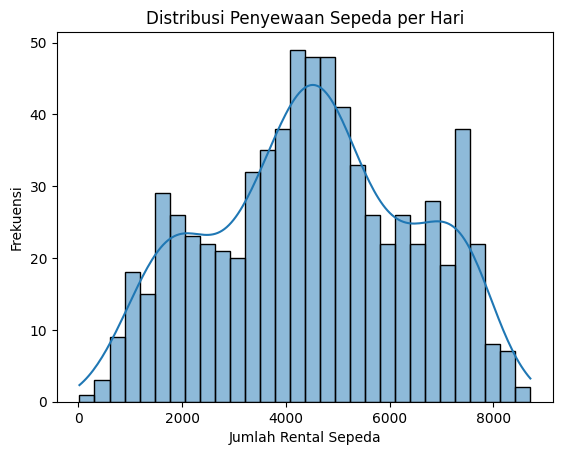

In [108]:
sns.histplot(day_df['Total_Pengguna'], bins=30, kde=True)
plt.xlabel('Jumlah Rental Sepeda')
plt.ylabel('Frekuensi')
plt.title('Distribusi Penyewaan Sepeda per Hari')
plt.show()

Berdasarkan histogram tersebut, sebaran data cukup simetris dengan mean sekitar 4504 dan standar deviasi sebesar 1937.

**Analisis Musiman**

In [109]:
day_df.groupby('Musim')['Total_Pengguna'].mean()

,Total_Pengguna
Musim,
Gugur,5644.303191
Panas,4992.331522
Salju,4728.162921
Semi,2604.132597


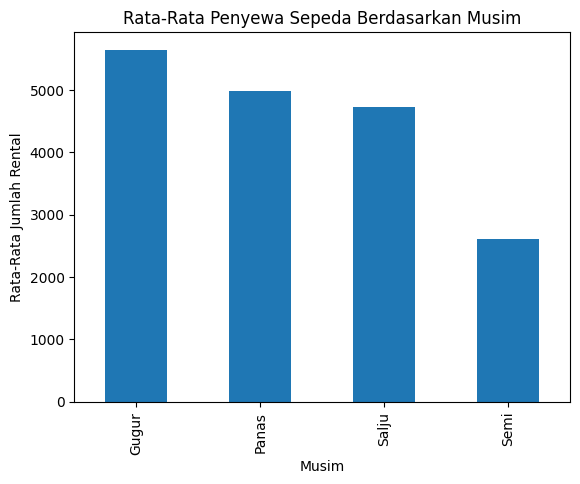

In [110]:
day_df.groupby('Musim')['Total_Pengguna'].mean().plot(kind='bar', title='Rata-Rata Penyewa Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Jumlah Rental')
plt.show()

Berdasarkan bar di atas, Rata-rata jumlah rental terbanyak terjadi saat musim gugur dengan jumlah 5644 penyewa.

**Rata-Rata Sewa Sepeda Berdasarkan Jenis Hari**

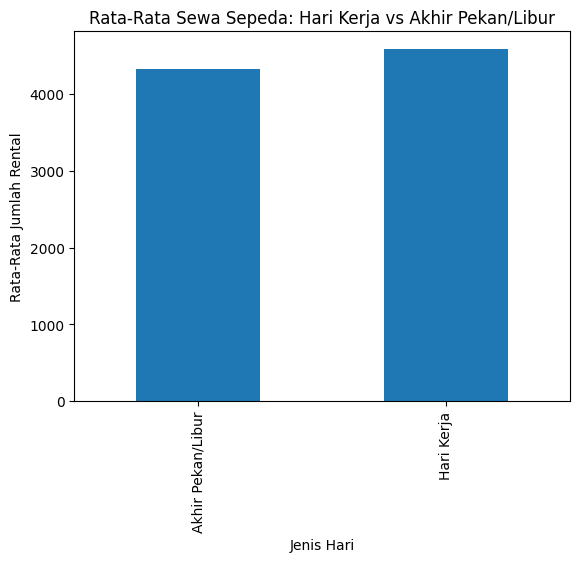

In [111]:
day_df.groupby('Jenis_Hari')['Total_Pengguna'].mean().plot(kind='bar', title='Rata-Rata Sewa Sepeda: Hari Kerja vs Akhir Pekan/Libur')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-Rata Jumlah Rental')
plt.show()

Dari visualisasi data di atas, rata-rata tertinggi jumlah penyewa terjadi pada Hari Kerja.

**Tren Penyewaan Sepeda Berdasarkan Bulan**

In [112]:
bul = day_df.groupby('Bulan')['Total_Pengguna'].mean().reset_index()
ordered_months = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
bul['Bulan'] = pd.Categorical(bul['Bulan'], categories=ordered_months, ordered=True)
bul = bul.sort_values('Bulan')
print(bul)

        Bulan  Total_Pengguna
4     Januari     2176.338710
3    Februari     2655.298246
7       Maret     3692.258065
1       April     4484.900000
8         Mei     5349.774194
6        Juni     5772.366667
5        Juli     5563.677419
0     Agustus     5664.419355
11  September     5766.516667
10    Oktober     5199.225806
9    November     4247.183333
2    Desember     3403.806452


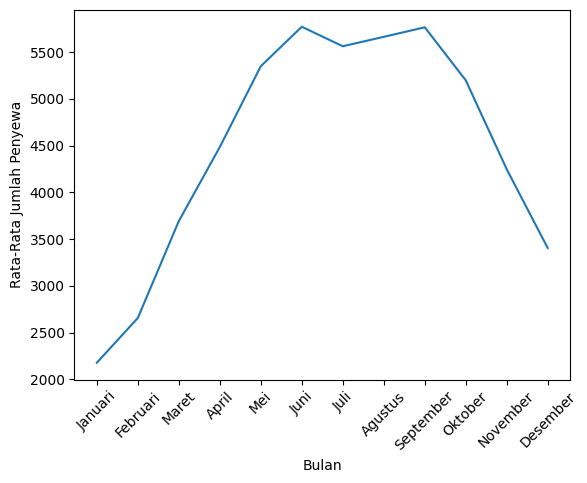

In [113]:
plt.plot(bul['Bulan'], bul['Total_Pengguna'])
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Jumlah Penyewa')
plt.xticks(rotation = 45)
plt.show()

Dari pengamatan grafik di atas, berdasarkan Bulan, rata-rata jumlah sewa tertinggi terjadi pada bulan Juni - September, sedangkan paling rendah terjadi pada bulan Januari

**Insight:**
- Rata-Rata Distirbusi Harian Penyewa adalah 4504 sepeda
- Rata-rata jumlah penyewa sepeda tertinggi terjadi pada musim Gugur, sendangkan terendah adalah musim Semi
- Berdasakan jenis harinya, rata-rata penyewaan sepeda terjadi pada Hari Kerja
- Berdasarkan bulan terjadinya, rata-rata penyewaan sepeda tertinggi terjadi pada bulan Juni - September, sedangkan terendahnya pada bulan Januari

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda selama jam sibuk di hari kerja?

<Figure size 2400x600 with 0 Axes>

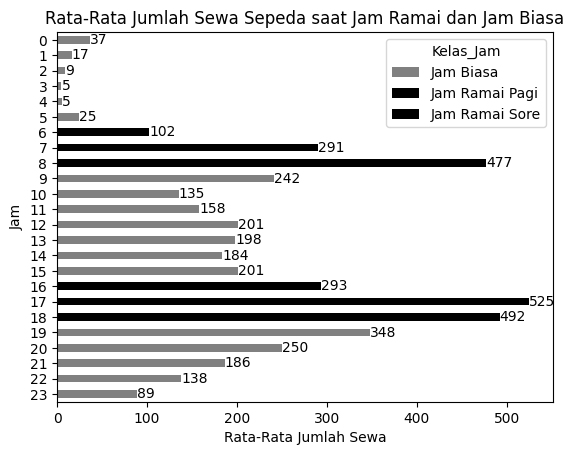

In [114]:
def classify_rush_hour(hour):
    if 6 <= hour < 9:  # Jam sibuk pagi
        return 'Jam Ramai Pagi'
    elif 16 <= hour < 19:  # Jam sibuk sore
        return 'Jam Ramai Sore'
    else:
        return 'Jam Biasa'

hour_df['Kelas_Jam'] = hour_df['Jam'].apply(classify_rush_hour)

hari_kerja = hour_df[hour_df['Jenis_Hari'] == 'Hari Kerja']

kelasjam = hari_kerja.groupby(['Kelas_Jam','Jam'])['Total_Pengguna'].mean().unstack('Kelas_Jam').sort_values(by='Jam', ascending = False)

# Visualisasi hasil pengelompokak
plt.figure(figsize = (24,6))
ax = kelasjam.plot(kind='barh', stacked = True, color=['grey', 'black', 'black'])
plt.title('Rata-Rata Jumlah Sewa Sepeda saat Jam Ramai dan Jam Biasa')
plt.xlabel('Rata-Rata Jumlah Sewa')
plt.ylabel('Jam')
for i in ax.containers:
    # Menambahkan label hanya jika nilainya lebih dari 0
    ax.bar_label(i, label_type='edge', fmt='%4.0f', labels=[f'{v:.0f}' if v > 0 else '' for v in i.datavalues])
plt.show()

In [115]:
total = 0
for x in kelasjam.columns:
  total = round(total + kelasjam[x].sum(), 0)
rata_rata_total = round(total/24,0)

jam_sibuk = ['Jam Ramai Pagi', 'Jam Ramai Sore']
total_jam_ramai = 0
for jam in jam_sibuk:
  total_jam_ramai = total_jam_ramai + kelasjam[jam].sum()
rata2_total_jam_ramai = total_jam_ramai/rata2_total_jam_ramai

print(f'Rata-rata penyewa sepeda di jam sibuk adalah {(round(((rata2_total_jam_ramai - rata_rata_total)/ rata_rata_total) * 100, 1))} % lebih tinggi daripada rata-rata penyewa di jam keseluruhan')

Rata-rata penyewa sepeda di jam sibuk adalah -96.9 % lebih tinggi daripada rata-rata penyewa di jam keseluruhan


Pola penggunaan sepeda cenderung naik di jam-jam sibuk. Di Hari Kerja, terjadi kenaikan yang signifikan pada jam 06.00 - 08.00 dimana orang-orang biasanya berangkat kerja dan pada jam 16.00 - 18.00 dimana orang-orang kembali ke rumah. Penggunaan sepeda menurun signifikan saat jam 09.00 di saat orang-orang sudah bekerja dan saat jam 19.00 di saat orang-orang sebagian mulai kembali ke rumah. Rata_rata penyewa sepeda di jam-jam sibuk adalah 89.3% lebih tinggi daripada jam-jam secara keseluruhan

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah sepeda yang disewa di akhir pekan atau hari libur?

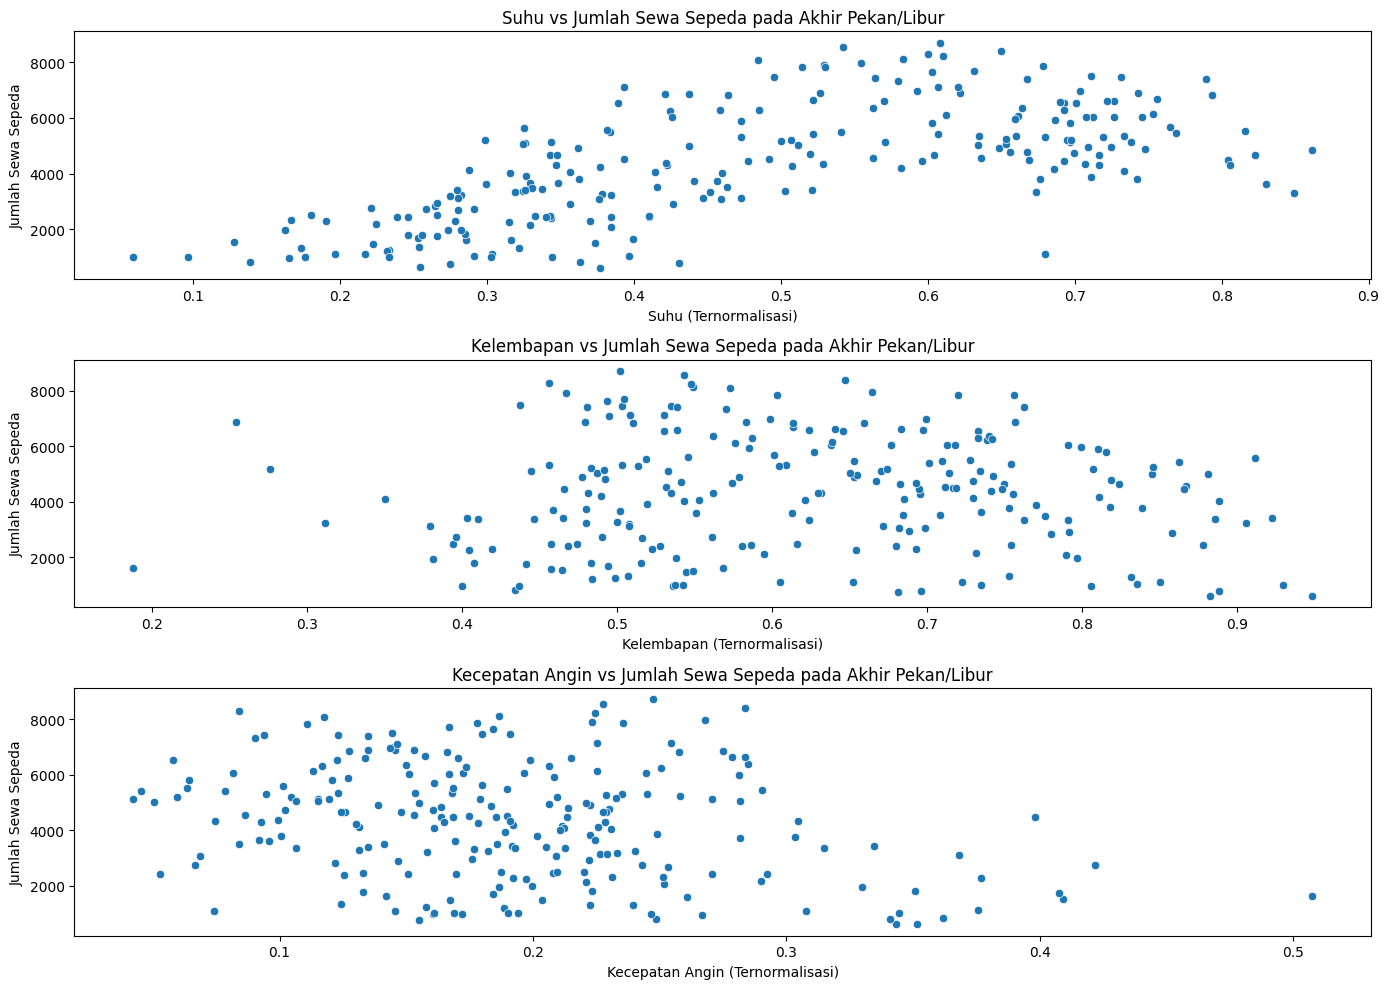

Korelasi variabel Cuaca dan Jumlah Sewa Sepeda pada Akhir Pekan/Libur:


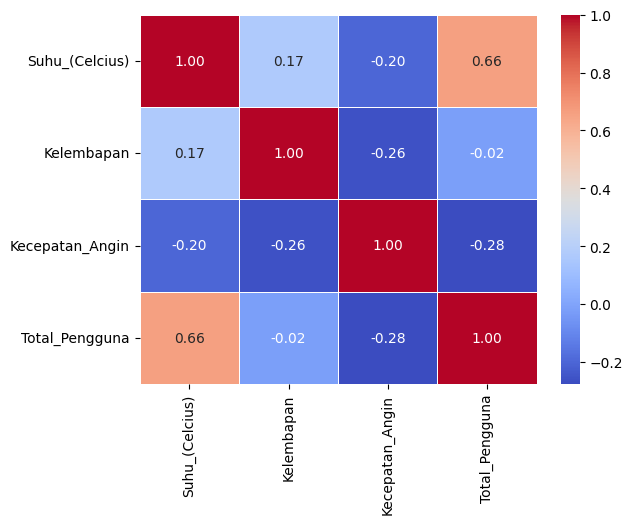

In [116]:
akhir_pekan_libur = day_df[day_df['Jenis_Hari'] == 'Akhir Pekan/Libur']

plt.figure(figsize=(14, 10))

# Plot 1: Suhu vs Penyewaan Sepeda
plt.subplot(3, 1, 1)
sns.scatterplot(x='Suhu_(Celcius)', y='Total_Pengguna', data=akhir_pekan_libur)
plt.title('Suhu vs Jumlah Sewa Sepeda pada Akhir Pekan/Libur')
plt.xlabel('Suhu (Ternormalisasi)')
plt.ylabel('Jumlah Sewa Sepeda')

# Plot 2: Kelembaban vs Penyewaan Sepeda
plt.subplot(3, 1, 2)
sns.scatterplot(x='Kelembapan', y='Total_Pengguna', data=akhir_pekan_libur)
plt.title('Kelembapan vs Jumlah Sewa Sepeda pada Akhir Pekan/Libur')
plt.xlabel('Kelembapan (Ternormalisasi)')
plt.ylabel('Jumlah Sewa Sepeda')

# Plot 3: Kecepatan Angin vs Penyewaan Sepeda
plt.subplot(3, 1, 3)
sns.scatterplot(x='Kecepatan_Angin', y='Total_Pengguna', data=akhir_pekan_libur)
plt.title('Kecepatan Angin vs Jumlah Sewa Sepeda pada Akhir Pekan/Libur')
plt.xlabel('Kecepatan Angin (Ternormalisasi)')
plt.ylabel('Jumlah Sewa Sepeda')

plt.tight_layout()
plt.show()

# 4. Korelasi antara variabel cuaca dan jumlah penyewaan sepeda
correlation = akhir_pekan_libur[['Suhu_(Celcius)', 'Kelembapan', 'Kecepatan_Angin', 'Total_Pengguna']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
print("Korelasi variabel Cuaca dan Jumlah Sewa Sepeda pada Akhir Pekan/Libur:")
plt.show()


1. Suhu vs Total Pengguna: Korelasi positif cukup kuat antara variabel suhu dan jumlah sewa sepeda. Artinya suhu yang cenderung naik, diikuti juga dengan kenaikan jumlah sewa sepeda. Hal ini selaras dengan  hasil analisis berdasarkan musim, yaitu rata-rata jumlah sewa sepeda yang cukup tinggi pada musim panas.
2. Kelembapan vs Total Pengguna: Korelasi yang lemah. Kelembapan tidak terkait dengan jumlah Total Pengguna
3. Kecepatan Angin vs Total Pengguna: Korelasi negatif biasa antara kecepatan angin dan total pengguna. Artinya tingginya kecepatan angin, sedikit diikuti dengan rendahnya total sepeda yang disewa.


## Analisis Lanjutan : Clustering dengan Binning

Untuk menjawab dua pertanyaan terakhir dilakukan analisis lanjutan sebagai berikut

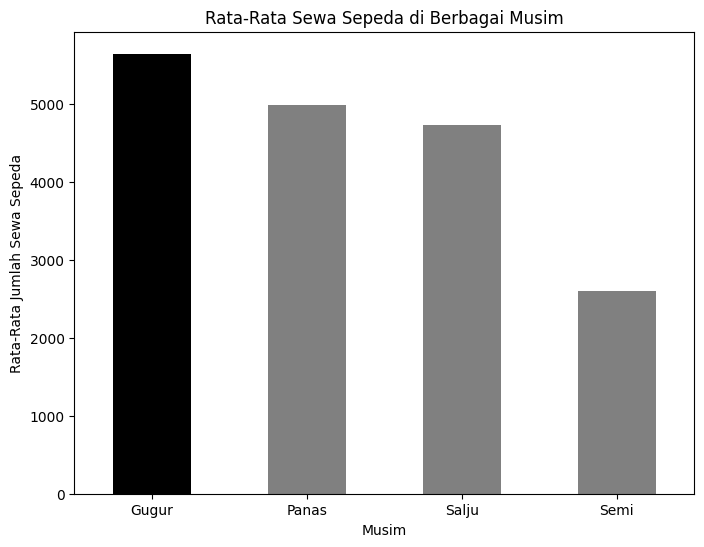

     Tanggal  Total_Pengguna Musim      Kategori_Sewa
0 2011-01-01             985  Semi  Rendah (0 - 2000)
1 2011-01-02             801  Semi  Rendah (0 - 2000)
2 2011-01-03            1349  Semi  Rendah (0 - 2000)
3 2011-01-04            1562  Semi  Rendah (0 - 2000)
4 2011-01-05            1600  Semi  Rendah (0 - 2000)


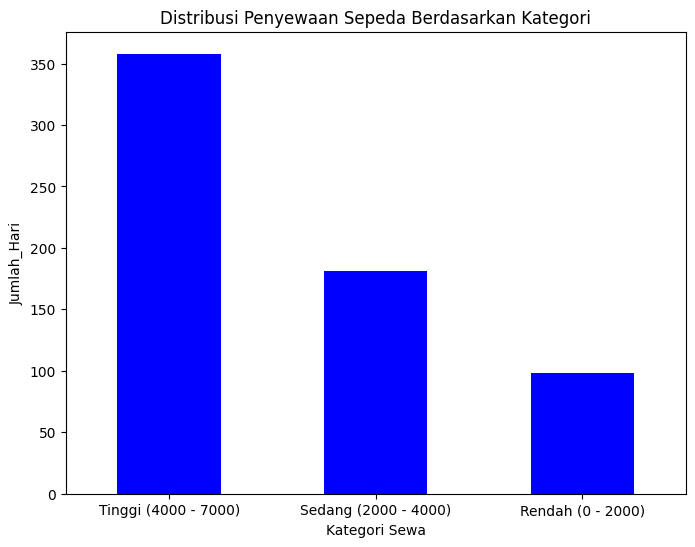

In [117]:
grup_musim = day_df.groupby('Musim')['Total_Pengguna'].mean()

plt.figure(figsize=(8, 6))
grup_musim.plot(kind='bar', color=['black', 'grey', 'grey', 'grey'])
plt.title('Rata-Rata Sewa Sepeda di Berbagai Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Jumlah Sewa Sepeda')
plt.xticks(rotation=0)
plt.show()

bins = [0, 2000, 4000, 7000]  # Interval untuk jumlah penyewaan sepeda
labels = ['Rendah (0 - 2000)', 'Sedang (2000 - 4000)', 'Tinggi (4000 - 7000)']  # Label untuk setiap bin
day_df['Kategori_Sewa'] = pd.cut(day_df['Total_Pengguna'], bins=bins, labels=labels)

print(day_df[['Tanggal', 'Total_Pengguna', 'Musim', 'Kategori_Sewa']].head())

plt.figure(figsize=(8, 6))
day_df['Kategori_Sewa'].value_counts().plot(kind='bar', color=['blue'])
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kategori')
plt.xlabel('Kategori Sewa')
plt.ylabel('Jumlah_Hari')
plt.xticks(rotation=0)
plt.show()


- Diberbagai musim disepanjang tahun, jumlah penyewaan sepeda cenderung fluktuatif. Di antara 3 musim lainnya, musim semi adalah musim yang paling kurang diminati ketika melakukan penyewaan sepeda.
- Setiap harinya, kategori sewa dalam dua tahun terakhir ini cenderung tinggi. Hal ini ditandai dengan jumlah sewa perhari berjumlah 4000-7000 (Kategori Tinggi) berada di percentil ke 50 ke atas.

## Conclusion

- **Kesimpulan pertanyaan 1** <br/>
Di hari kerja, jam-jam sibuk saat pekerja berangkat ke tempat kerja dan kembali ke rumah sangat mempengaruhi jumlah penyewaan sepeda, ditunjukkan dengan rata-rata penyewa sepeda di jam-jam sibuk adalah 89.3% lebih tinggi daripada jam-jam secara keseluruhan.

- **Kesimpulan pertanyaan 2** <br/>
Di akhir pekan, variabel suhu paling terkait atau berpengaruh terhadap kenaikan penyewaan sepeda, ditandai dengan korelasi positif yang cukup besar, yaitu 0.66.

- **Kesimpulan pertanyaan 3 & 4** <br/>
1. Perbedaan jumlah penyewaan yang sangat rendah terjadi pada musim semi, sedangkan pada musim-musim lainnya cenderung fluktuatif dengan standar deviasi yang tidak terlalu jauh
2. Distribusi penyewa sepeda setiap harinya paling banyak masuk kedalam kategori Tinggi. Hal ini menandai bahwa bahwa secara keseluruhan usaha rental sepeda ini cukup ramai


**Export Clean Dataset**

In [151]:
day_df.to_csv('clean_day_df.csv')

In [152]:
hour_df.to_csv('clean_hour_df.csv')

In [153]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Instan              731 non-null    int64         
 1   Tanggal             731 non-null    datetime64[ns]
 2   Musim               731 non-null    object        
 3   Tahun               731 non-null    int64         
 4   Bulan               731 non-null    object        
 5   Hari                731 non-null    object        
 6   Jenis_Hari          731 non-null    object        
 7   Cuaca               731 non-null    object        
 8   Suhu_(Celcius)      731 non-null    float64       
 9   Kelembapan          731 non-null    float64       
 10  Kecepatan_Angin     731 non-null    float64       
 11  Pengguna_Umum       731 non-null    int64         
 12  Pengguna_Terdaftar  731 non-null    int64         
 13  Total_Pengguna      731 non-null    int64         